<a href="https://colab.research.google.com/github/iyngaran/skin-disease-detection-using-machine-learning-algorithms/blob/master/Model_improvements_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model_improvements_05

Rescale the images with - layers.experimental.preprocessing.Rescaling 

And adject the model by changing parameters

In [3]:
# Download images of lesion diagnosis
import zipfile

!wget  https://testing.idev55.com/lesion-diagnosis-images.zip

# Unzip the downloaded file
zip_file = zipfile.ZipFile("lesion-diagnosis-images.zip", "r")
zip_file.extractall()
zip_file.close()

--2022-09-26 15:52:35--  https://testing.idev55.com/lesion-diagnosis-images.zip
Resolving testing.idev55.com (testing.idev55.com)... 3.84.41.34
Connecting to testing.idev55.com (testing.idev55.com)|3.84.41.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2529414732 (2.4G) [application/zip]
Saving to: ‘lesion-diagnosis-images.zip’

lesion-diagnosis-im 100%[===================>]   2.36G  92.0MB/s    in 26s     

2022-09-26 15:53:02 (91.8 MB/s) - ‘lesion-diagnosis-images.zip’ saved [2529414732/2529414732]



In [4]:
!mv 'Lesion diagnosis' lesion-diagnosis

In [5]:
!ls

lesion-diagnosis  lesion-diagnosis-images.zip  __MACOSX  sample_data


In [6]:
!ls lesion-diagnosis

images


In [7]:
!ls lesion-diagnosis/images

all-images  test  train


In [8]:
!ls lesion-diagnosis/images/train

'actinic keratosis'	 melanoma  'pigmented benign keratosis'
'basal cell carcinoma'	 nevus	   'seborrheic keratosis'


In [9]:
!mv lesion-diagnosis/images/train/'actinic keratosis' lesion-diagnosis/images/train/actinic-keratosis
!mv lesion-diagnosis/images/train/'pigmented benign keratosis' lesion-diagnosis/images/train/pigmented-benign-keratosis
!mv lesion-diagnosis/images/train/'basal cell carcinoma' lesion-diagnosis/images/train/basal-cell-carcinoma
!mv lesion-diagnosis/images/train/'seborrheic keratosis' lesion-diagnosis/images/train/seborrheic-keratosis

!mv lesion-diagnosis/images/test/'actinic keratosis' lesion-diagnosis/images/test/actinic-keratosis
!mv lesion-diagnosis/images/test/'pigmented benign keratosis' lesion-diagnosis/images/test/pigmented-benign-keratosis
!mv lesion-diagnosis/images/test/'basal cell carcinoma' lesion-diagnosis/images/test/basal-cell-carcinoma
!mv lesion-diagnosis/images/test/'seborrheic keratosis' lesion-diagnosis/images/test/seborrheic-keratosis

In [10]:
!ls lesion-diagnosis/images/train

actinic-keratosis     melanoma	pigmented-benign-keratosis
basal-cell-carcinoma  nevus	seborrheic-keratosis


In [11]:
!ls lesion-diagnosis/images/test

actinic-keratosis     melanoma	pigmented-benign-keratosis
basal-cell-carcinoma  nevus	seborrheic-keratosis


In [12]:
!ls lesion-diagnosis/images/train/actinic-keratosis

ISIC_0032404.JPG  ISIC_0058640.JPG  ISIC_0063883.JPG  ISIC_0069195.JPG
ISIC_0032422.JPG  ISIC_0058653.JPG  ISIC_0063890.JPG  ISIC_0069211.JPG
ISIC_0032437.JPG  ISIC_0058756.JPG  ISIC_0063927.JPG  ISIC_0069265.JPG
ISIC_0032854.JPG  ISIC_0058762.JPG  ISIC_0063956.JPG  ISIC_0069269.JPG
ISIC_0033151.JPG  ISIC_0058769.JPG  ISIC_0064022.JPG  ISIC_0069282.JPG
ISIC_0033358.JPG  ISIC_0058776.JPG  ISIC_0064063.JPG  ISIC_0069283.JPG
ISIC_0033413.JPG  ISIC_0058864.JPG  ISIC_0064067.JPG  ISIC_0069289.JPG
ISIC_0033456.JPG  ISIC_0058884.JPG  ISIC_0064151.JPG  ISIC_0069352.JPG
ISIC_0033494.JPG  ISIC_0058890.JPG  ISIC_0064196.JPG  ISIC_0069384.JPG
ISIC_0033705.JPG  ISIC_0058902.JPG  ISIC_0064211.JPG  ISIC_0069460.JPG
ISIC_0033811.JPG  ISIC_0058924.JPG  ISIC_0064222.JPG  ISIC_0069483.JPG
ISIC_0033866.JPG  ISIC_0058939.JPG  ISIC_0064231.JPG  ISIC_0069518.JPG
ISIC_0053478.JPG  ISIC_0058940.JPG  ISIC_0064262.JPG  ISIC_0069532.JPG
ISIC_0053506.JPG  ISIC_0058951.JPG  ISIC_0064322.JPG  ISIC_0069544.JPG
ISIC_0

In [13]:
!rm -f lesion-diagnosis/images/train/actinic-keratosis/metadata.csv
!rm -f lesion-diagnosis/images/train/melanoma/metadata.csv
!rm -f lesion-diagnosis/images/train/pigmented-benign-keratosis/metadata.csv
!rm -f lesion-diagnosis/images/train/basal-cell-carcinoma/metadata.csv
!rm -f lesion-diagnosis/images/train/nevus/metadata.csv
!rm -f lesion-diagnosis/images/train/seborrheic-keratosis/metadata.csv

!rm -f lesion-diagnosis/images/test/actinic-keratosis/metadata.csv
!rm -f lesion-diagnosis/images/test/melanoma/metadata.csv
!rm -f lesion-diagnosis/images/test/pigmented-benign-keratosis/metadata.csv
!rm -f lesion-diagnosis/images/test/basal-cell-carcinoma/metadata.csv
!rm -f lesion-diagnosis/images/test/nevus/metadata.csv
!rm -f lesion-diagnosis/images/test/seborrheic-keratosis/metadata.csv

In [14]:
!ls -a lesion-diagnosis/images/train/actinic-keratosis/

.		  ISIC_0058623.JPG  ISIC_0063878.JPG  ISIC_0069195.JPG
..		  ISIC_0058639.JPG  ISIC_0063883.JPG  ISIC_0069211.JPG
.DS_Store	  ISIC_0058640.JPG  ISIC_0063890.JPG  ISIC_0069265.JPG
ISIC_0032404.JPG  ISIC_0058653.JPG  ISIC_0063927.JPG  ISIC_0069269.JPG
ISIC_0032422.JPG  ISIC_0058756.JPG  ISIC_0063956.JPG  ISIC_0069282.JPG
ISIC_0032437.JPG  ISIC_0058762.JPG  ISIC_0064022.JPG  ISIC_0069283.JPG
ISIC_0032854.JPG  ISIC_0058769.JPG  ISIC_0064063.JPG  ISIC_0069289.JPG
ISIC_0033151.JPG  ISIC_0058776.JPG  ISIC_0064067.JPG  ISIC_0069352.JPG
ISIC_0033358.JPG  ISIC_0058864.JPG  ISIC_0064151.JPG  ISIC_0069384.JPG
ISIC_0033413.JPG  ISIC_0058884.JPG  ISIC_0064196.JPG  ISIC_0069460.JPG
ISIC_0033456.JPG  ISIC_0058890.JPG  ISIC_0064211.JPG  ISIC_0069483.JPG
ISIC_0033494.JPG  ISIC_0058902.JPG  ISIC_0064222.JPG  ISIC_0069518.JPG
ISIC_0033705.JPG  ISIC_0058924.JPG  ISIC_0064231.JPG  ISIC_0069532.JPG
ISIC_0033811.JPG  ISIC_0058939.JPG  ISIC_0064262.JPG  ISIC_0069544.JPG
ISIC_0033866.JPG  ISIC_0058940.JPG  I

In [15]:
import os

# Walk through the lesion-diagnosis directory and remove .DS_Store file from all the folders
for dirpath in os.walk("lesion-diagnosis"):
  file_path = dirpath[0] + "/.DS_Store"
  if os.path.isfile(file_path):
    os.remove(file_path)

In [16]:
!rm -rf lesion-diagnosis/images/all-images
!cp -R lesion-diagnosis/images lesion-diagnosis/all-images
!mv lesion-diagnosis/all-images lesion-diagnosis/all-lesion-diagnosis-images

In [17]:
# Walk through the lesion-diagnosis directory and list number of files
for dirpath, dirnames, filenames in os.walk("lesion-diagnosis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'lesion-diagnosis'.
There are 2 directories and 0 images in 'lesion-diagnosis/images'.
There are 6 directories and 0 images in 'lesion-diagnosis/images/train'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/basal-cell-carcinoma'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/pigmented-benign-keratosis'.
There are 0 directories and 790 images in 'lesion-diagnosis/images/train/actinic-keratosis'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/melanoma'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/seborrheic-keratosis'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/nevus'.
There are 6 directories and 0 images in 'lesion-diagnosis/images/test'.
There are 0 directories and 200 images in 'lesion-diagnosis/images/test/basal-cell-carcinoma'.
There are 0 directories and 200 images in 'lesion-diagnosis/images/test/pigmented

**we've have.**


*   800 training images and 200 testing images for melanoma,pigmented-benign-keratosis,basal-cell-carcinoma,nevus,seborrheic-keratosis
*   only for actinic-keratosis, we have 790 images for training and 120 images for testing

In [18]:
# Get the class names programmatically
import pathlib
import numpy as np

# turn our training path into a Python path and created a list of class_names from the subdirectories
data_dir = pathlib.Path("lesion-diagnosis/images/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['actinic-keratosis' 'basal-cell-carcinoma' 'melanoma' 'nevus'
 'pigmented-benign-keratosis' 'seborrheic-keratosis']


**Visualize the images**

In [19]:
# A resuable function to view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (3456, 5184, 3)


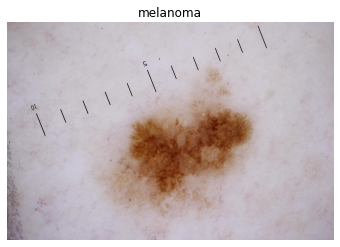

In [20]:
# View a random image from the training dataset
img = view_random_image(target_dir="lesion-diagnosis/images/train/",
                        target_class="melanoma")

In [21]:
# View the shape of the image 
img.shape # returns (width, height, colour channels)

(3456, 5184, 3)

In [20]:
# View the img (array)
img

array([[[18, 17, 13],
        [22, 21, 17],
        [25, 24, 20],
        ...,
        [42, 25, 18],
        [42, 25, 18],
        [44, 27, 20]],

       [[16, 15, 11],
        [19, 18, 14],
        [22, 21, 17],
        ...,
        [45, 28, 21],
        [46, 29, 22],
        [47, 30, 23]],

       [[19, 18, 16],
        [22, 21, 19],
        [24, 23, 21],
        ...,
        [47, 30, 23],
        [47, 30, 23],
        [48, 31, 24]],

       ...,

       [[20, 16, 15],
        [20, 16, 15],
        [19, 15, 14],
        ...,
        [31, 20, 18],
        [33, 22, 20],
        [35, 24, 22]],

       [[20, 16, 15],
        [20, 16, 15],
        [19, 15, 14],
        ...,
        [32, 21, 19],
        [32, 21, 19],
        [33, 22, 20]],

       [[22, 18, 17],
        [22, 18, 17],
        [22, 18, 17],
        ...,
        [33, 22, 20],
        [31, 20, 18],
        [31, 20, 18]]], dtype=uint8)

In [22]:
# convert the img to tensors
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(3456, 5184, 3), dtype=uint8, numpy=
array([[[153, 138, 143],
        [152, 137, 142],
        [150, 135, 140],
        ...,
        [175, 163, 173],
        [176, 164, 174],
        [177, 165, 175]],

       [[152, 137, 142],
        [151, 136, 141],
        [151, 136, 141],
        ...,
        [175, 163, 173],
        [176, 164, 174],
        [177, 165, 175]],

       [[151, 136, 141],
        [151, 136, 141],
        [152, 137, 142],
        ...,
        [176, 164, 174],
        [176, 164, 174],
        [176, 164, 174]],

       ...,

       [[ 94,  84,  93],
        [ 93,  83,  92],
        [ 94,  84,  93],
        ...,
        [160, 146, 161],
        [160, 146, 161],
        [160, 146, 161]],

       [[ 95,  85,  94],
        [ 95,  85,  94],
        [ 95,  85,  94],
        ...,
        [160, 146, 161],
        [160, 146, 161],
        [160, 146, 161]],

       [[ 96,  86,  95],
        [ 95,  85,  94],
        [ 96,  86,  95],
        ...,
        [160, 146, 

The the values in the img tensor are between 0 and 255. It is the possible range for red, green and blue values.

For an example, the first element 24, 18, 18 gives the image.png


**We should normalize the values before pass them to ML algorithms as normalized pixel values**


In [23]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.6       , 0.54117647, 0.56078431],
        [0.59607843, 0.5372549 , 0.55686275],
        [0.58823529, 0.52941176, 0.54901961],
        ...,
        [0.68627451, 0.63921569, 0.67843137],
        [0.69019608, 0.64313725, 0.68235294],
        [0.69411765, 0.64705882, 0.68627451]],

       [[0.59607843, 0.5372549 , 0.55686275],
        [0.59215686, 0.53333333, 0.55294118],
        [0.59215686, 0.53333333, 0.55294118],
        ...,
        [0.68627451, 0.63921569, 0.67843137],
        [0.69019608, 0.64313725, 0.68235294],
        [0.69411765, 0.64705882, 0.68627451]],

       [[0.59215686, 0.53333333, 0.55294118],
        [0.59215686, 0.53333333, 0.55294118],
        [0.59607843, 0.5372549 , 0.55686275],
        ...,
        [0.69019608, 0.64313725, 0.68235294],
        [0.69019608, 0.64313725, 0.68235294],
        [0.69019608, 0.64313725, 0.68235294]],

       ...,

       [[0.36862745, 0.32941176, 0.36470588],
        [0.36470588, 0.3254902 , 0.36078431],
        [0.36862745, 0

# Building a convolutional neural network



*   Load all the images
*   Preprocess / normalize the images
*   Build a CNN to find patterns in the images
*   Compile our CNN
*   Fit the CNN to our training data



In [24]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9
epochs = 20

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0)
train_data_generator = ImageDataGenerator(rescale=1./255) # Generates batches of tensor image data with real-time data augmentation
valid_data_generator = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "lesion-diagnosis/images/train/"
test_dir = "lesion-diagnosis/images/test/"

# Import data from directories and turn it into batches
# It will create the data and lables automatically for us
train_data = train_data_generator.flow_from_directory(train_dir,
                                               batch_size=batch_size, # number of images to process at a time 
                                               target_size=(img_height, img_width), # convert all images to be 224 x 224
                                               class_mode="binary", # we're working on binary data
                                               seed=42)

valid_data = valid_data_generator.flow_from_directory(test_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="binary",
                                               seed=42)

Found 4790 images belonging to 6 classes.
Found 1120 images belonging to 6 classes.


In [26]:
train_data, valid_data

(<keras.preprocessing.image.DirectoryIterator at 0x7f98e5f606d0>,
 <keras.preprocessing.image.DirectoryIterator at 0x7f98e5f78810>)

# Build a CNN model

In [27]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(img_height, img_width, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(16, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(64, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(num_classes) # binary activation output
])


# Compile the model & Fit

In [28]:
# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/20
150/150 [==============================] - 274s 2s/step - loss: 1.8216 - accuracy: 0.1614 - val_loss: 1.8016 - val_accuracy: 0.1786
Epoch 2/20
150/150 [==============================] - 253s 2s/step - loss: 1.8023 - accuracy: 0.1668 - val_loss: 1.7936 - val_accuracy: 0.1786
Epoch 3/20
 30/150 [=====>........................] - ETA: 2:49 - loss: 1.7921 - accuracy: 0.1842

KeyboardInterrupt: ignored

In [38]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 176, 176, 16)      1456      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 88, 88, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 86, 86, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 84, 84, 64)        18496     
                                                      